## Programming Exercise 1: Linear Regression
I started working on the Machine Learning course by Andrew Ng. The following notebook contains exercise solution for linear regression using gradient descent algorithm. 

This exercise was done using Numpy library functions. I also used **_scikit-learn_** library to demonstrate another way of linear regression plotting.

In [1]:
# Standard imports. Importing seaborn for styling.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")

### 2 Linear regression with one variable

#### 2.1 Plotting the Data

We start by importing the exercise txt file, reading the file, and then unpacking the values to X and y variables:

In [2]:
# Exercise txt file import
data = 'data/ex1data1.txt'

# reading the file and unpacking the values to X and y
x, y = np.loadtxt(data, delimiter=',', usecols=(0, 1), unpack=True)

# viewing the imported values (first 5)
x[:5], y[:5]

(array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598]),
 array([ 17.592 ,   9.1302,  13.662 ,  11.854 ,   6.8233]))

To take into account the intercept term (θ0), we add an additional first column to X and set it to all ones (as it is mentioned in the exercise instruction):

In [3]:
X = np.ones((len(x), 2))
X[:,1] = x
X[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

__*Scatter plot*__ of training data:

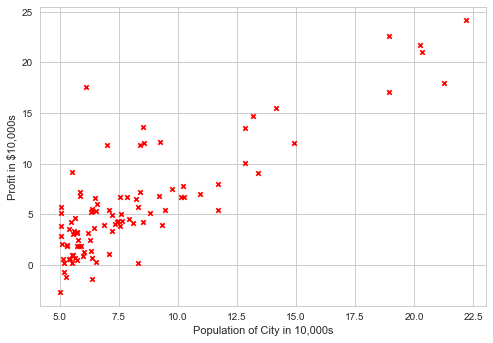

In [4]:
plt.scatter(X[:,1], y, marker='x', c='r', s=20)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s");

Using **scikit-learn** library to plot linear regression. Printing the **intercept** and **slope** of the model:

Model intercept:  -3.89578087831
Model slope:      1.19303364419


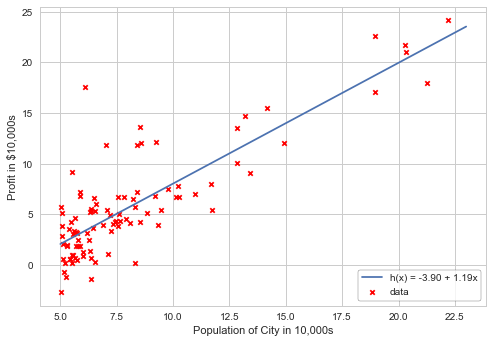

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:,1][:, np.newaxis], y)

xfit = np.linspace(5, 23, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X[:,1], y, marker='x', c='r', s=20, label='data')
plt.plot(xfit, yfit, label='h(x) = %0.2f + %0.2fx'%(model.intercept_, model.coef_[0]))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');
print("Model intercept: ", model.intercept_)
print("Model slope:     ", model.coef_[0])

### 2.2 Gradient Descent
#### 2.2.2 Implementation
Adding __*θ0 (theta)*__ intercept term, initializing parameters to 0, and adding variables for iterations and learning rate __*alpha*__:

In [6]:
iterations = 1500
alpha = 0.01

# adding θ0
theta = np.zeros(2)
theta

array([ 0.,  0.])

#### 2.2.3 Computing the cost J(θ)

In [7]:
def computeCost(X, y, theta):
    m = len(y)
    return np.dot((np.dot(X, theta) - y), (np.dot(X, theta) - y)) / (2 * m)

Using __*theta*__ initialized to zero, we should be getting a cost of __*32.07*__:

In [8]:
computeCost(X, y, theta)

32.072733877455669

#### 2.2.4 Gradient descent
Next step is to implement gradient descent algorithm. θ0 and θ1 for every iteration are simultaniously updated, and assigned to Theta. Meanwhile cost is calculated for every iteration and added to the array.

In [9]:
# Gradient descent algorithm
def gradientDescent(X, y, theta, alpha, iterations):
    m = len(y)
    cost = np.zeros(iterations)
    thetaMod = theta.copy()
    thetaHist = np.zeros(iterations)
    
    for i in range(iterations):
        thetaMod = thetaMod - np.dot(X.T, (np.dot(X, thetaMod) - y)) * alpha / m
        thetaHist[i] = thetaMod[1]        
        cost[i] = computeCost(X, y, thetaMod)
        
    return thetaMod, thetaHist, cost

We can now check the __*intercept and slope*__ values calculated by the algoritm, and print the logs:

In [10]:
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)  
gradient

array([-3.63029144,  1.16636235])

Plotting the cost per iteration. The cost value never increases, as it is expected:

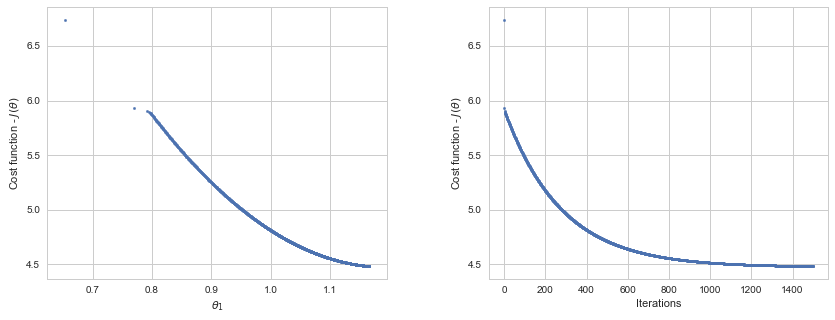

In [11]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(thetaHist, cost,  marker='o', s=6)
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r"Cost function - $J(\theta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(iterations), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\theta)$");

Plotting the __*linear fit*__ model with the provided data:

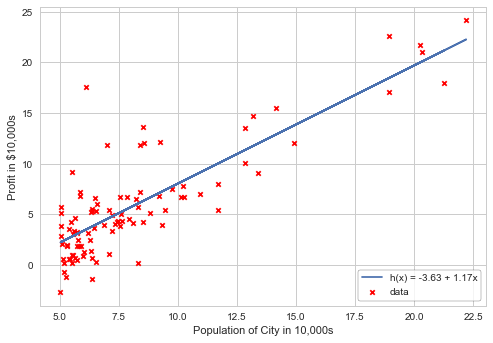

In [12]:
def linearFit(value):
    return gradient[0] + gradient[1] * value

plt.scatter(X[:,1], y, marker='x', c='r', s=20, label='data')
plt.plot(X[:, 1], linearFit(X[:, 1]), label='h(x) = %0.2f + %0.2fx'%(gradient[0], gradient[1]))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');

Profit prediction for the cities with populations of 35000 and 70000:

In [13]:
print("Profit for pop. 35000: %0.2f"%(gradient.dot([1, 3.5]) * 10000))
print("Profit for pop. 70000: %0.2f"%(gradient.dot([1, 7]) * 10000))

Profit for pop. 35000: 4519.77
Profit for pop. 70000: 45342.45


### 2.4 Visualizing J(θ)

Calculating J(θ) over a grid of values using the computeCost function:

In [14]:
# Grid to calculate cost values
theta0_vals = np.linspace(-10, 10, 80)
theta1_vals = np.linspace(-1, 4, 80)

# initialize J_vals to a matrix of 0's:
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals:
for i in np.arange(theta0_vals.size):
    for j in np.arange(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = computeCost(X, y, t)

Now we can use 2-D array of J(θ) values to produce surface and contour plots:

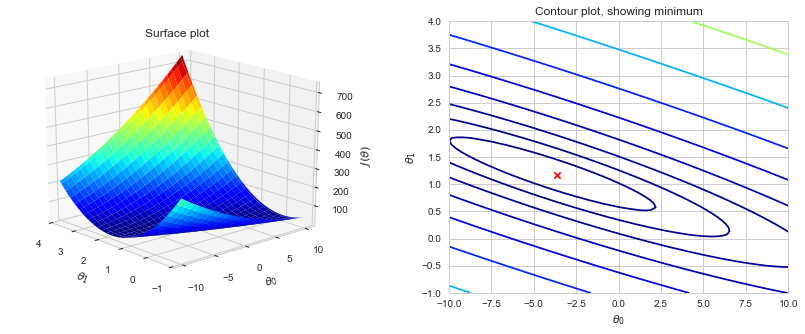

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

theta0, theta1 = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot:
ax1.set_title('Surface plot')
ax1.plot_surface(theta1, theta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=20, azim=318)
ax1.set_xlabel(r'$\theta_1$', labelpad=8)
ax1.set_xlim(4,-1)
ax1.set_ylabel(r'$\theta_0$', labelpad=8)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\theta)$', labelpad=8);

# Contour plot:
ax2.set_title('Contour plot, showing minimum')
ax2.contour(theta0, theta1, J_vals.T, np.logspace(-2, 3, 20),  cmap='jet')
ax2.scatter(gradient[0], gradient[1], marker='x', color='r', s=40)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_yticks(np.arange(-1,4.5,0.5));

### 3 Linear regression with multiple variables

In [16]:
# reading the file and unpacking the values to X and y
data = np.loadtxt('data/ex1data2.txt', delimiter=',')
x, y = data[:,:2], data[:,2]

# viewing the imported values (first 5 rows)
x[:5], y[:5]

(array([[  2.10400000e+03,   3.00000000e+00],
        [  1.60000000e+03,   3.00000000e+00],
        [  2.40000000e+03,   3.00000000e+00],
        [  1.41600000e+03,   2.00000000e+00],
        [  3.00000000e+03,   4.00000000e+00]]),
 array([ 399900.,  329900.,  369000.,  232000.,  539900.]))

#### 3.1 Feature Normalization

Let's start by plotting the features. We can now visualize the data and see if normalization is required. 

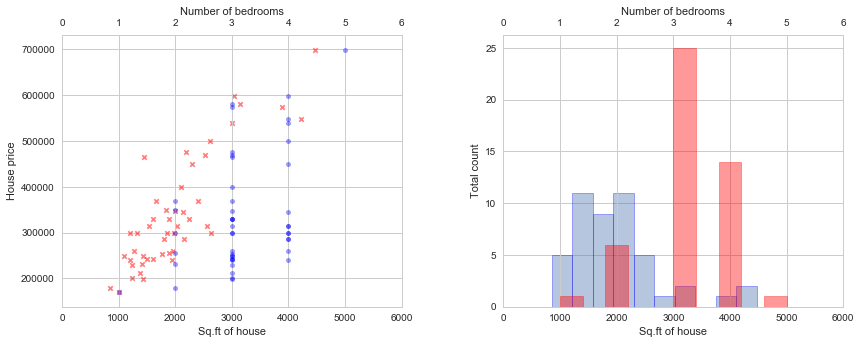

In [17]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

Defining the feature normalization function:

In [18]:
def featureNormalize(X):    
    # mean and std. deviation:
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

Now we can calculate the features normalized, and plot them to see the difference from the previous plots:

In [19]:
X, mean, sigma = featureNormalize(x)
X[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

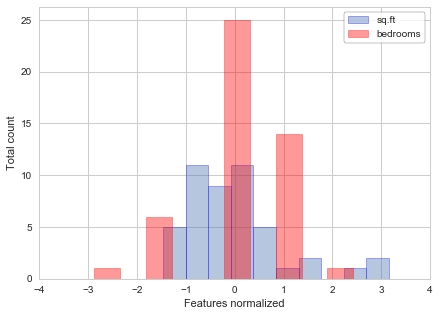

In [20]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

### 3.2 Gradient Descent

As in __2.1__ we add an additional first column to X and set it to all ones:

In [21]:
X = np.hstack((np.ones((X.shape[0],1)), X))
X[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

We can now add theta and calculate the gradient descent  for multi parameters:

In [22]:
# adding theta
theta = np.zeros(3)

# calculating gradient descent
gradient, thetaHist, cost = gradientDescent(X, y, theta, alpha, iterations)  
gradient

array([ 340412.56301439,  109370.05670466,   -6500.61509507])

#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

Testing multiple learning rates, and plotting the cost for each learning rate per the iterations:

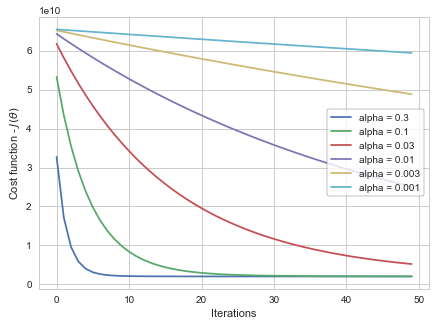

In [23]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    gradientNew, thetaHistNew, costNew = gradientDescent(X, y, theta, alpha, 50) 
    
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

Predicting the house price using the best learning rate:

In [24]:
# running the gradient descent algorithm with best learning rate:
gradient, thetaHist, cost = gradientDescent(X, y, theta, 0.03, 500)  

# normalizing the parameters:
paramsNorm = (np.array([1650, 3]) - mean) / sigma

# adding first column of ones
params = np.hstack((np.array([1]), paramsNorm))

# predicting a house price
predict = np.dot(gradient, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293097.99


### 3.3 Normal Equation

We can use normal equation which does not require any feature scaling. There is no "loop until convergence" like in gradient descent:

In [25]:
from numpy.linalg import inv

# defining normal equation:
def normalEqn(X, y):
    invert = inv(np.dot(X.T, X))
    return np.dot(invert, np.dot(X.T, y))

In [26]:
# X was previously normalized, so we reassign values to X
X = np.ones((len(x), 3))
X[:, 1:] = x

thetaN = normalEqn(X, y)
thetaN

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

In [27]:
# A price prediction for a 1650-square-foot house with 3 bedroom
params = np.array([1, 1650, 3]) 

predict = np.dot(thetaN, params)
print ('A 3 bedroom / 1650 sqft house will cost $%0.2f' % predict)

A 3 bedroom / 1650 sqft house will cost $293081.46
